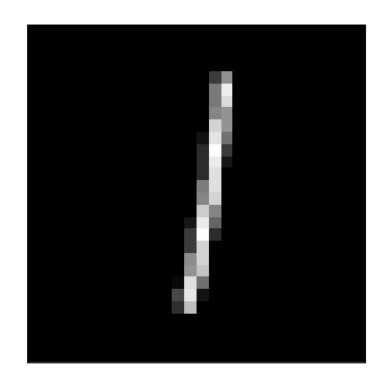

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Replace 'your_image.webp' with the path to your .webp image file
image_path = 'MNIST_57_0.webp'

# Load the .webp image file
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim

def dist(a, b):
    return torch.sqrt(0.001 + (a[0] - b[0]) * (a[0] - b[0]) + (a[1] - b[1]) * (a[1] - b[1]))

def f(x):
    return 1/(1 + torch.pow(x, 4))

def kernel(input, a, b, x, c = 1):
    d = (dist(a, x) + dist(b, x) - dist(a, b)) / c
    return (1 - input) * f(d) + input * d

# assert kernel(1.0, torch.tensor([0.0, 1.0]), torch.tensor([1.0, 0.0]), torch.tensor([0.0, 1.0])) > 0.95
# assert kernel(1.0, torch.tensor([0.0, 1.0]), torch.tensor([1.0, 0.0]), torch.tensor([1.0, 1.0])) < 1.0
# assert kernel(1.0, torch.tensor([0.0, 1.0]), torch.tensor([1.0, 0.0]), torch.tensor([-1.0, 2.0])) < 0.2

In [107]:
import torchvision.transforms as transforms
transform = transforms.ToTensor()
input = transform(image.resize((28,28)))[0]
input.shape

torch.Size([28, 28])

In [135]:
a.clone().detach().numpy().list()

AttributeError: 'numpy.ndarray' object has no attribute 'list'

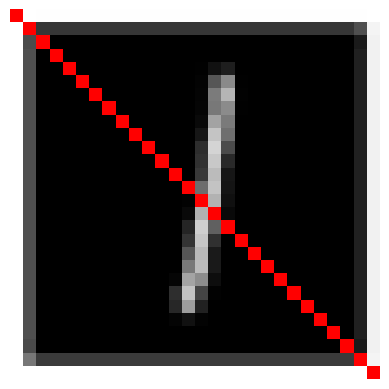

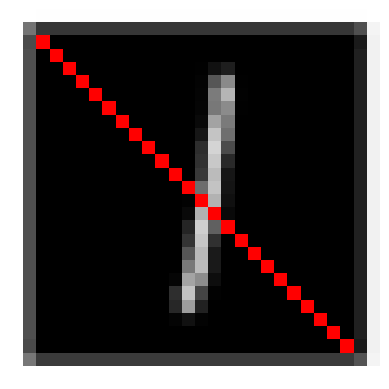

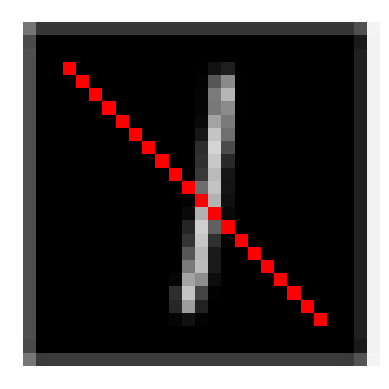

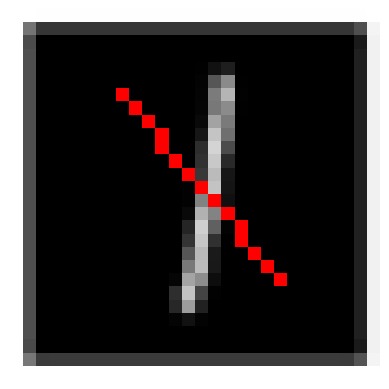

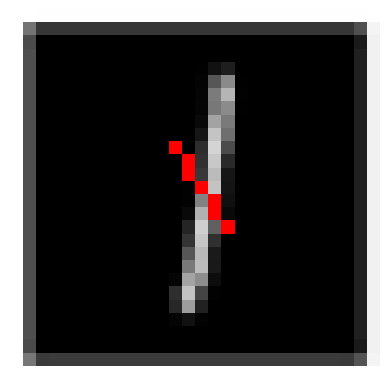

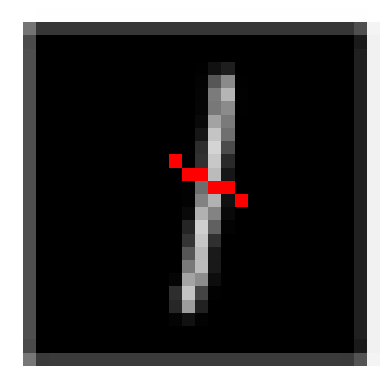

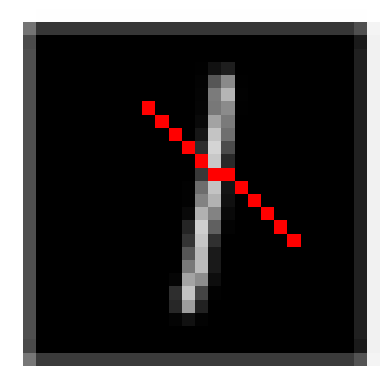

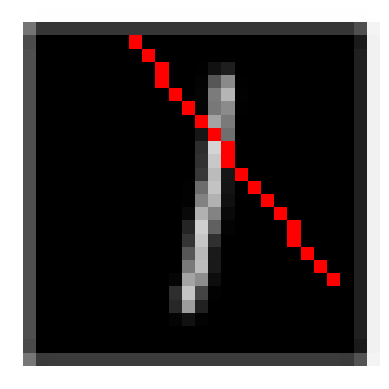

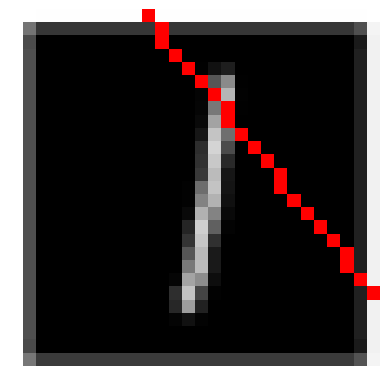

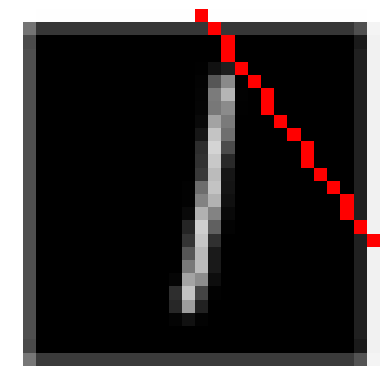

(tensor([30.1381, 21.4516], requires_grad=True), tensor([11.0442, -4.2502], requires_grad=True))


In [144]:
def calc_reward(a, b, c = 1):
    reward = torch.tensor([0.0])
    for i in range(0, 28):
        for j in range(0, 28):
                k = kernel(input[i, j], a, b, torch.tensor([i, j]), c)
                reward += input[i, j] * k
    return reward
a = torch.tensor([0.0,0.0], requires_grad = True)
b = torch.tensor([28.0,28.0], requires_grad = True)
optimizer = optim.SGD([a,b], lr=1.0)

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
def show(a, b):
    image28_shown = image.resize((28, 28))
    draw = ImageDraw.Draw(image28_shown)
    draw.line([(a[0], a[1]), (b[0], b[1])], fill=(255, 0, 0), width=1)  # Red line with thickness 5
    plt.imshow(image28_shown)
    plt.axis('off')  # Turn off axis numbers
    plt.show()


for _ in range(0,10):
    (-calc_reward(a, b, 5)+dist(a,b)).backward()
    optimizer.step()
    show(a, b)
# for _ in range(0,50):
#     (-calc_reward(a, b, 2)+dist(a,b)).backward()
#     optimizer.step()
# for _ in range(0,50):
#     (-calc_reward(a, b, 1)+dist(a,b)).backward()
#     optimizer.step()
print((a,b))